In [ ]:
import pandas
print(pandas.__version__)

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
month_data=""
f_name=""
def month_import(month):
    global df
    global month_data
    global f_name
    if month.lower()=='january':
        f_name='bus_station_month_january.csv'
        month_data="1월"
    elif month.lower()=='feburary':
        f_name='bus_station_month_feburary.csv'
        month_data="2월"
    elif month.lower()=='march':
        f_name='bus_station_month_march.csv'
        month_data="3월"
    elif month.lower()=='april':
        f_name='bus_station_month_april.csv'
        month_data="4월"
    elif month.lower()=='may':
        f_name='bus_station_month_may.csv'
        month_data="5월"
    elif month.lower()=='june':
        f_name='bus_station_month_june.csv'
        month_data="6월"
    else:
        raise ValueError('잘못 입력하셨습니다.')
    df=pd.read_csv(f_name,encoding='cp949')
    return df
choose_month=input("2023년 데이터중 몇 월 데이터를 불러오시겠습니까(영어로 입력하세요)?")
df=month_import(choose_month)
bus_name=input('버스 노선을 입력해주세요(csv파일의 노선 번호열을 참고하여 입력해주세요).')
df2=df[df['노선번호']==bus_name]
bus_name_in_data=False
if df2.empty:
    raise ValueError("입력한 버스 노선 데이터가 %s 파일에 존재하지 않습니다."%(f_name))
for index, row in df2.iterrows():
    if bus_name in row['노선번호']:
        plt.figure(dpi=300)
        plt.rc('font',family='Malgun Gothic')
        plt.title("%s, %s번 버스, 정류장 : %s"%(month_data,bus_name,row[5]))
        values=row[6:8]
        labels=['승차승객수','하차승객수']
        data_labels=[f"{label}: {value}" for label,value in zip(labels,values)]
        plt.pie(values, labels=data_labels, autopct='%.1f%%')
        plt.axis('equal')
        plt.show()

2023년 데이터중 몇 월 데이터를 불러오시겠습니까(영어로 입력해주셍요)? may
버스 노선을 입력해주세요(csv파일의 노선 번호명을 참고하여 입력해주세요). 341


C:\Users\user\AppData\Local\Temp\ipykernel_12844\2636565813.py:52: UserWarning: Tight layout not applied. tight_layout cannot make axes width small enough to accommodate all axes decorations
  plt.tight_layout()


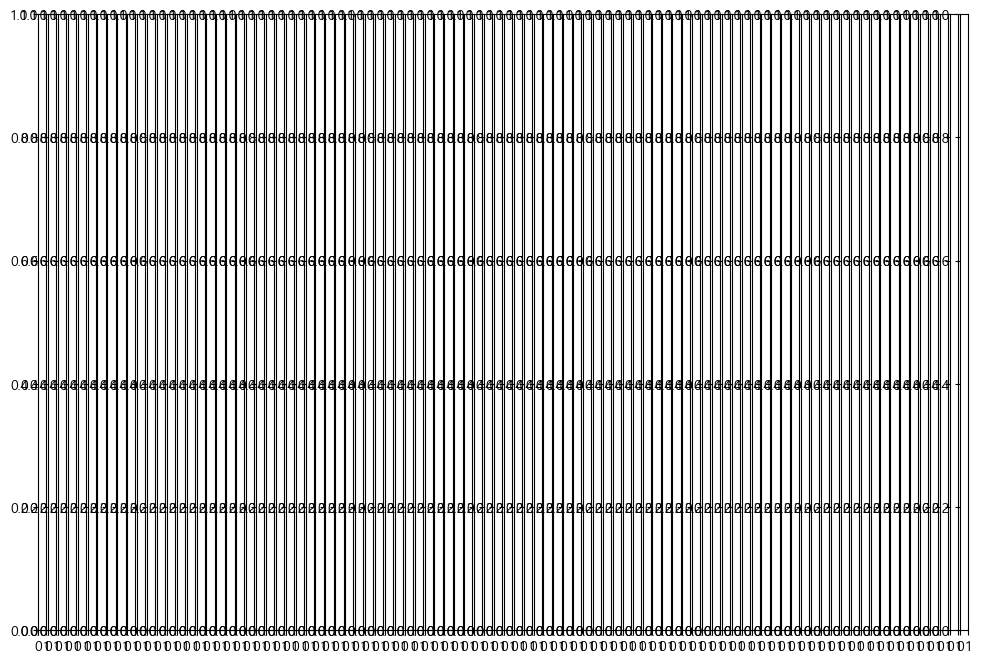

In [8]:
import pandas as pd
import matplotlib.pyplot as plt
month_data=""
f_name=""
def month_import(month):
    global df
    global month_data
    global f_name
    if month.lower()=='january':
        f_name='bus_station_month_january.csv'
        month_data='1월'
    elif month.lower()=='feburary':
        f_name='bus_station_month_feburary.csv'
        month_data='2월'
    elif month.lower()=='march':
        f_name='bus_station_month_march.csv'
        month_data='3월'
    elif month.lower()=='april':
        f_name='bus_station_month_april.csv'
        month_data='4월'
    elif month.lower()=='may':
        f_name='bus_station_month_may.csv'
        month_data='5월'
    elif month.lower()=='june':
        f_name='bus_station_month_june.csv'
        month_data='6월'
    else:
        raise ValueError("잘못 입력하셨습니다.")
    df=pd.read_csv(f_name,encoding='cp949')
    return df
def plot_pie_chart(df2,bus_name,month_data):
    plt.figure(dpi=300)
    plt.rc('font',family='Malgun Gothic')
    plt.title("%s, %s번 버스, 정류장 : %s" % (month_data, bus_name, df2.iloc[0, 5]))
    plt.pie(values,labels=data_labels,autopct='%.1f%%')
    plt.axis('equal')
choose_month=input("2023년 데이터중 몇 월 데이터를 불러오시겠습니까(영어로 입력해주셍요)?")
df=month_import(choose_month)
bus_name=input('버스 노선을 입력해주세요(csv파일의 노선 번호명을 참고하여 입력해주세요).')
df2=df[df['노선번호']==bus_name]
if df2.empty:
    raise ValueError('입력한 버스 노선 데이터가 %s 파일에 존재하지 않습니다.'%(f_name))
plt.figure(figsize=(12,8))
num_subplots=len(df2)
for i in range(num_subplots):
    plt.subplot(1,num_subplots,i+1)
    values=df2.iloc[i,6:8]
    labels=['승차승객수','하차승객수']
    data_labels=[f"{label}:{value}" for label,value in zip(labels,values)]
    plot_pie_chart(df2.iloc[[i]], bus_name, month_data)
    plt.close()
plt.tight_layout()
plt.show()

In [ ]:
import matplotlib.pyplot as plt
import numpy as np
fig,axes=plt.subplots(2,2)
x=[i for i in range(20)]
y=[np.random.randint(1,10) for i in range(20)]
axes[0][0].title("test")
axes[0][0].plot(x,y)
x=range(20)
y=[np.random.randint(1,10) for i in range(20)]
axes[0][1].bar(x,y)
x=range(20)
y=[np.random.randint(1,10) for i in range(20)]
axes[1][0].bar(x,y)
x=range(20)
y=[np.random.randint(1,10) for i in range(20)]
axes[1][1].scatter(x,y)
plt.tight_layout()
plt.show()